# 1 Reading Data
In this section you will be working on A subset of the data from the Western Collaborative Group Study (described in Rosenman et al. 1975). The WCGS (Western Collaborative Group Study) began in 1960 with 3,524 male volunteers who were employed by 11 California companies. Subjects were 39 to 59 years old and free of heart disease as determined by electrocardiogram. After the initial screening, the study population dropped to 3,154 and the number of companies to 10 because of various exclusions. The cohort comprised both blue- and white-collar employees. At baseline the following information was collected: socio-demographic including age, education, marital status, income, occupation; physical and physiological including height, weight, blood pressure, electrocardiogram, and corneal arcus; biochemical including cholesterol and lipoprotein fractions; medical and family history and use of medications; behavioral data including Type A interview, smoking, exercise, and alcohol use. Later surveys added data on anthropometry, triglycerides, Jenkins Activity Survey, and caffeine use. 

Using [pandas.read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html), load the dataset into a DataFrame from the **wcgs_partial.xlsx** file (**You may need to use pip or conda to install openpyxl in addition to pandas module/library**).

Your data contains only the following information: age, arcus (Arcus senilis is a white, gray, or blue looking ring surrounding the cornea. This is commonly seen in elderlies but can also affect people of any age.
Arcus senilis is usually harmless, although it is sometimes a symptom of high cholesterol in people below 45 years old.), BMI (basic metabolic rate),	chol (cholestrol), 	height, 	ncigs (number of cigars),  	sbp (systolic blood pressure), and	weight

Reference : 

Rosenman RH, Brand RJ, Jenkins CD, Friedman M, Straus R, Wurm M (1975). "Coronary Heart Disease in the Western Collaborative Group Study. Final Follow-up Experience of 8 1/2 Years." JAMA, 233(8), 872-7.

In [1]:
# Import required libraries
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [2]:
wcgs_df = pd.read_excel('wcgs_partial.xlsx', nrows=3142)

# WCGS Multiple Regression Analysis Assignment

#### Dataset: Partial Western Collaborative Group Study (WCGS)
#### Target Variable: Cholesterol (`chol`)
#### Main Predictors: `age`, `bmi`, `sbp`, `ncigs`

---

**Instructions:**   
- Show your code and outputs for all parts.  
- Interpret your results in a biomedical context.

---

## Part 1: Data Setup and Exploration (**5 points**)

- Generate a new Data frame by selecting the columns: `chol`, `age`, `bmi`, `sbp`, `ncigs`
- Display basic statistics and check for missing values (hint: use info(), describe(), isnull()





In [3]:
# Generate a new Data frame with selected features and target 'chol', 'age', 'bmi', 'sbp', 'ncigs'
df = wcgs_df[['chol', 'age', 'bmi', 'sbp', 'ncigs']]

# Display basic statistics and check for missing values
num_null = df.isnull().sum()
print(num_null, "\n")

df.info()
df.describe()

chol     0
age      0
bmi      0
sbp      0
ncigs    0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   chol    3142 non-null   int64  
 1   age     3142 non-null   int64  
 2   bmi     3142 non-null   float64
 3   sbp     3142 non-null   int64  
 4   ncigs   3142 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 122.9 KB


,chol,age,bmi,sbp,ncigs
count,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,226.372374,46.274666,24.514472,128.609166,11.574793
std,43.420426,5.518455,2.563803,15.052683,14.491420
min,103.000000,39.000000,11.190612,98.000000,0.000000
25%,197.250000,42.000000,22.955103,120.000000,0.000000
50%,223.000000,45.000000,24.389795,126.000000,0.000000
75%,253.000000,50.000000,25.840160,136.000000,20.000000
max,645.000000,59.000000,38.947369,230.000000,99.000000


## Part 2: Pairwise Relationship Analysis (**15 points total**)

### **Code Implementation** (**3 points**)
### Instructions:
Create a pairwise plot using Seaborn to visualize relationships between all variables in your dataset. This will help you understand the structure of your data before building regression models.

### Your Task:
Use the `sns.pairplot()` function to create a comprehensive visualization of all variable relationships in your dataset.

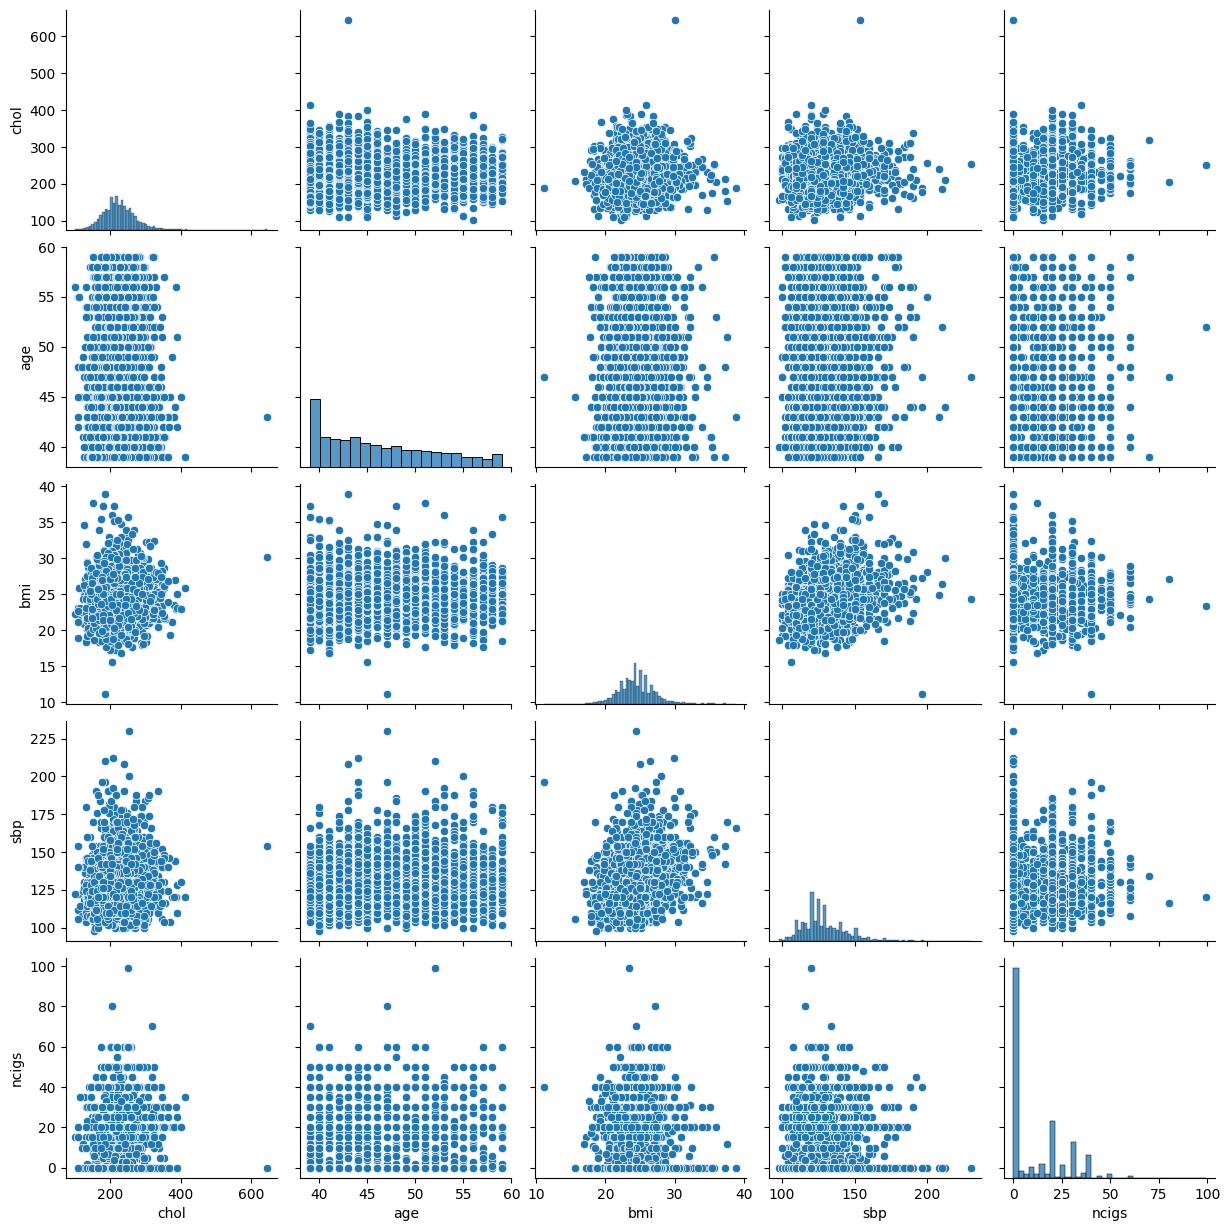

In [ ]:
# Creating a pairwise plot in Seaborn (a statistical data visualization)
sns.pairplot(df)


#### **Question 2.1** (**4 points**)
**Examine the diagonal plots (histograms):**
- Which variable appears to have the most normal distribution? 
- Which variable shows the most skewness? In which direction?
- Are there any variables with unusual distributions (e.g., bimodal, heavy tails)?

*Write your answer here:*

#### **Question 2.2** (**4 points**)
**Examine the scatter plots for relationships with cholesterol (`chol`):**
- Which predictor shows the strongest linear relationship with cholesterol, if any?
- Which predictor shows the weakest relationship with cholesterol, if any?

None show a strong linear relationship with cholesterol. The weakest relationship is with age.

#### **Question 2.3** (**4 points**)
**Examine relationships between predictors (multicollinearity check):**
- Which two predictors appear most strongly correlated with each other?
- Why might this correlation be a concern for multiple regression?
- Based on the pairplot, do you expect any multicollinearity issues in your regression model?

*Write your answer here:*

## Part 3: Multiple Regression Model Fitting (**20 points total**)

### Instructions:
Fit a multiple regression model to predict cholesterol levels using age, BMI, systolic blood pressure, and number of cigarettes per day. Use statsmodels to get detailed statistical output including t-tests, F-tests, and confidence intervals.

### **Code Implementation** (**11 points**)

**Your Task:** 
1. Define your predictor variables (X) and target variable (y)
2. Add an intercept term for statsmodels
3. Fit an OLS model and display the summary

**Hint:** You'll need to import statsmodels, use `sm.add_constant()`, and `sm.OLS().fit()`


In [4]:
# Write your code here
import statsmodels.api as sm

X = df[['age', 'bmi', 'sbp', 'ncigs']] # predictor variables
y = df['chol'] # target variable: cholestorol

# add an intercept term for statsmodels
X = sm.add_constant(X)

# fit an OLS model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# display summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   chol   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     25.24
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           1.31e-20
Time:                        17:56:08   Log-Likelihood:                -16256.
No. Observations:                3142   AIC:                         3.252e+04
Df Residuals:                    3137   BIC:                         3.255e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        140.0778     10.341     13.546      0.0

### **Model Interpretation Questions**

#### **Question 3.1: Coefficient Significance** (**3 points**)
Examine the coefficient table in your model summary:
- Which predictors are statistically significant at $\alpha = 0.05$?
- Which predictor has the largest effect size (absolute coefficient value)?
- Are there any predictors that are NOT significant? If so, which ones?

*Write your answer here:*

#### **Question 3.2: Clinical Interpretation** (**3 points**)
Choose ONE statistically significant predictor and provide a complete clinical interpretation:
- What is the coefficient value and its units?
- What does this mean in practical terms for a patient?
- Is the relationship positive or negative, and does this make clinical sense?

*Write your answer here:*

#### **Question 3.3: Overall Model Performance** (**3 points**)
Look at the model summary statistics:
- What is the $R^2$ value and what does it tell you?
- Is the overall model statistically significant? (Look at the F-statistic p-value)
- How would you describe this model's performance in predicting cholesterol?

*Write your answer here:*


## Part 4: Cross-Validation Analysis (**15 points total**)

### Instructions:
Perform 5-fold cross-validation to assess how well your multiple regression model generalizes to unseen data. This will help you understand if your model is overfitting and provide a more realistic estimate of predictive performance.

### **Code Implementation** (**5 points**)

**Your Task:** 
1. Set up 5-fold cross-validation with shuffling
2. Use sklearn's LinearRegression and cross_val_score
3. Calculate and display invidual $R^2$ for each fold along with the mean and standard deviation of CV $R^2$ scores

**Hint:** You'll need `KFold`, `LinearRegression`, and `cross_val_score` from sklearn. Use `scoring='r2'` and set `random_state=42` for reproducibility.

In [6]:
# Cross-validation using sklearn

# perform 5-fold cross-validation to asses how well your multiple regression model generalizes to unseen data
# set up 5-fold cross-validation with shuffling
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# use sklearn's LinearRegression
lr = LinearRegression()

# use cross_val_score
mse_scores = cross_val_score(lr, X, y, cv=kf, scoring='r2')

# calculate R^2 scores for each fold along with the mean and standard deviation of CV R^2 scores
print("R^2 scores for each fold: ", mse_scores)
print("Mean R^2 score: ", np.mean(mse_scores))
print("Standard Deviation of R^2 scores: ", np.std(mse_scores))

R^2 scores for each fold:  [0.01284436 0.01676055 0.03535155 0.02116448 0.04336927]
Mean R^2 score:  0.025898044077677086
Standard Deviation of R^2 scores:  0.01158370945622439


### **Cross-Validation Interpretation Questions**

#### **Question 4.1: CV Performance Assessment** (**5 points**)
Analyze your cross-validation results:
- What is the mean CV $R^2$ and its standard deviation?
- How does the CV $R^2$ compare to your $R^2$ from Part 3?
- What does the standard deviation tell you about model stability across folds?

*Write your answer here:*

#### **Question 4.2: Generalization and Overfitting** (**5 points**)
Based on your CV results:
- Is there evidence of overfitting? Explain your reasoning.
- How confident are you that this model will perform equally on new, unseen patients?
- If the CV $R^2$ is much lower than $R^2$ in part 3, what might this suggest about your model?

*Write your answer here:*



## Part 5: Cross-Validation Visualization (**15 points total**)

### Instructions:
Create visualizations to better understand the variability and distribution of your cross-validation results. You'll create both a boxplot and a bar chart to show different perspectives on CV performance.

### **Code Implementation** (**10 points**)

**Your Task:** 
1. Create a figure with two subplots side by side
2. Left subplot: Vertical boxplot showing CV $R^2$ distribution with a horizontal dashline overlaid parallel to the x axis representing mean $R^2$. Add labesl and title and legend for mean.
3. Right subplot: Bar chart showing individual fold performance with annotations. Add a horizontal dashline overlaid parallel to the x axis representing mean $R^2$. Add labesl and title and legend for mean.

**Hint:** You'll need `plt.figure()`, `plt.subplot()`, `plt.boxplot()`, `plt.bar()`, and `plt.scatter()`. Don't forget to add mean lines, labels, and annotations.

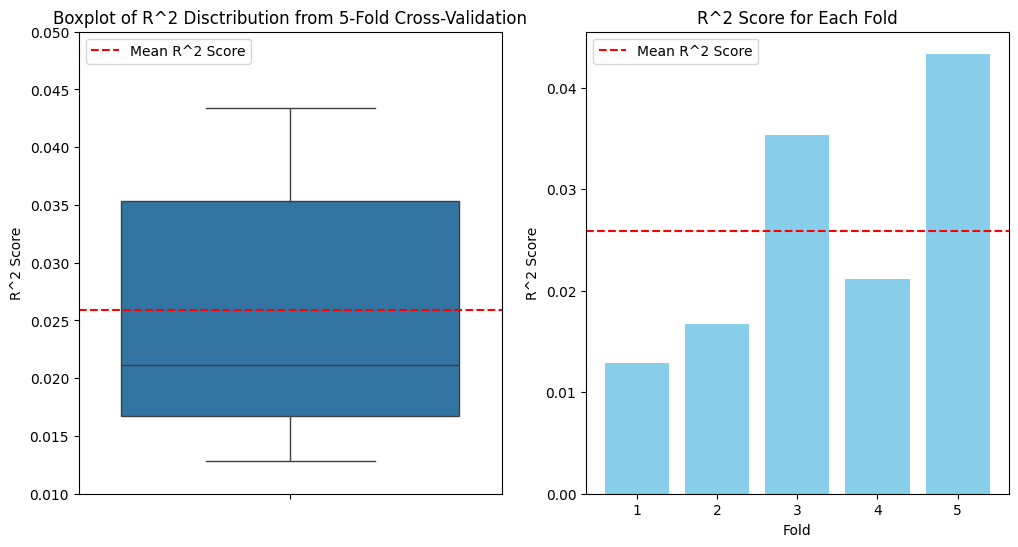

In [16]:
#Write your code here

# create a figure with two subplots
plt.figure(figsize=(12, 6))


# LEFT SUBPLOT
plt.subplot(1, 2, 1)
plt.title('Boxplot of R^2 Disctribution from 5-Fold Cross-Validation')
plt.ylabel('R^2 Score')
plt.ylim(0.01, 0.05) # set y-axis limits for better visualization (don't have legend block boxplot)

sns.boxplot(y=mse_scores)

# add horizontal dashline for mean R^2
plt.axhline(y=np.mean(mse_scores), color='r', linestyle='--', label='Mean R^2 Score')
plt.legend(loc='upper left')


# RIGHT SUBPLOT
plt.subplot(1, 2, 2)
plt.title('R^2 Score for Each Fold')
plt.ylabel('R^2 Score')
plt.xlabel('Fold')

folds = np.arange(1, 6)
plt.xticks(folds)

# bar chart showing individual fold performance
plt.bar(folds, mse_scores, color='skyblue')

# add a horizontal dashline for mean R^2
plt.axhline(y=np.mean(mse_scores), color='r', linestyle='--', label='Mean R^2 Score')
plt.legend()



### **Visualization Interpretation Questions**

#### **Question 5.1: Distribution Analysis** (**2.5 points**)
Examine your boxplot (left subplot):
- What does the boxplot tell you about the distribution of CV $R^2$ scores?
- Are there any outliers in your CV performance?

*Write your answer here:*

#### **Question 5.2: Fold-by-Fold Analysis** (**2.5 points**)
Examine your bar chart (right subplot):
- Which fold performed best? Which performed worst?
- Is the variation between folds concerning or acceptable?

*Write your answer here:*

## Part 6: Model Diagnostic Plot - Fitted vs Actual (**15 points total**)

### Instructions:
Create a diagnostic plot to assess how well your model's predictions match the actual observed values. This "fitted vs actual" plot is crucial for evaluating model performance and identifying potential issues with your regression model.

### **Code Implementation** (**10 points**)

**Your Task:** 
1. Fit a LinearRegression model on the full dataset and generate predictions
2. Create a scatter plot with fitted values on x-axis and actual values on y-axis
3. Add a diagonal reference line (perfect prediction line) from min to max values
4. Set equal axis limits for proper comparison
5. Add $R^2$ value as text annotation with a background box
6. Include proper labels, title, and formatting

**Specific Requirements:**
- Use blue scatter points with transparency (alpha=0.6)
- Red dashed diagonal line (lw=2)
- Set axis limits from minimum value to 450
- Place $R^2$ text in upper left corner (0.05, 0.95) with white background box
- Figure size should be (12, 4)

Text(0.05, 0.95, 'R^2 = 0.031')

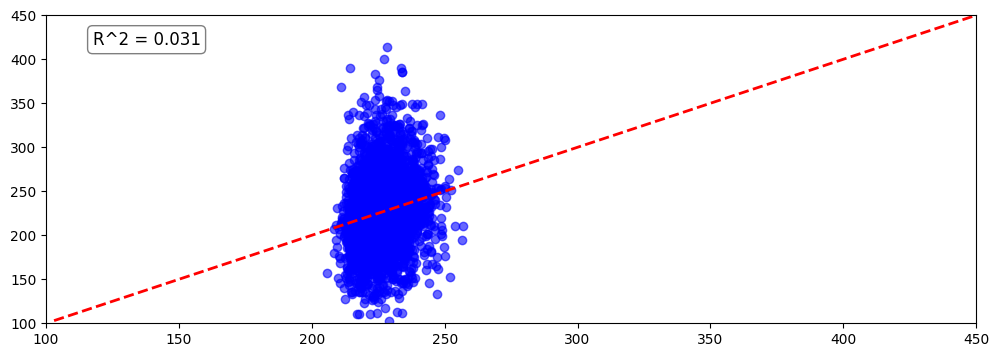

In [17]:
# Write your code here

# fit a linear regression model on the full dataset and generate predictions
lr.fit(X, y)
y_pred = lr.predict(X)

# create a scatter plot with fitted values on x-axis and actual values on y-axis
plt.figure(figsize=(12, 4))

# use blue scatter points with transparency (alpha=0.6)
plt.scatter(y_pred, y, color='blue', alpha=0.6)

# add a diagonal reference line (perfect prediction line) from min to max values
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)

# set equal axis limits for proper comparison, set axis limits from minimum value to 450
plt.xlim(100, 450)
plt.ylim(100, 450)

#add R^2 value as text in upper left corner (0.05, 0.95) with white background box
r2 = r2_score(y, y_pred)
plt.text(0.05, 0.95, f'R^2 = {r2:.3f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))

### **Diagnostic Plot Interpretation Questions**

#### **Question 6.1: Model Fit Assessment** (**3 points**)
Examine your fitted vs actual plot:
- How closely do the points follow the diagonal red line?
- Are there any systematic patterns or deviations from the diagonal line?

*Write your answer here:*

#### **Question 6.2: Prediction Quality** (**2 points**)
Based on the scatter pattern:
- For which range of cholesterol values does the model predict best/worst?
- Are there any obvious outliers (points far from the diagonal)?
- Would you trust this model to make predictions for new patients? Why or why not?

*Write your answer here:*



## Part 7: Model Diagnostic Plot - Fitted vs Residuals (**15 points total**)

### Instructions:
Create a residual plot to check key regression assumptions including linearity, homoscedasticity (constant variance), and identify potential outliers. This diagnostic plot is essential for validating whether your regression model is appropriate for the data.

### **Code Implementation** (**10 points**)

**Your Task:** 
1. Calculate residuals (actual - predicted values)
2. Create a scatter plot with fitted values on x-axis and residuals on y-axis
3. Add a horizontal zero line (red dashed) to show perfect predictions
4. Add horizontal reference lines at $\pm$1 and $\pm$2 standard deviations
5. Include proper labels, legend, grid, and formatting

**Specific Requirements:**
- Use green scatter points with transparency (alpha=0.6)
- Red dashed zero line (lw=2) with label 'Zero line'
- Orange dotted lines (alpha=0.7) for $\pm$1 SD with labels
- Orange dotted lines (alpha=0.5) for $\pm$2 SD with labels  
- Include legend and light grid (alpha=0.3)
- Figure size should be (12, 4)
- Use `plt.tight_layout()` for proper spacing

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

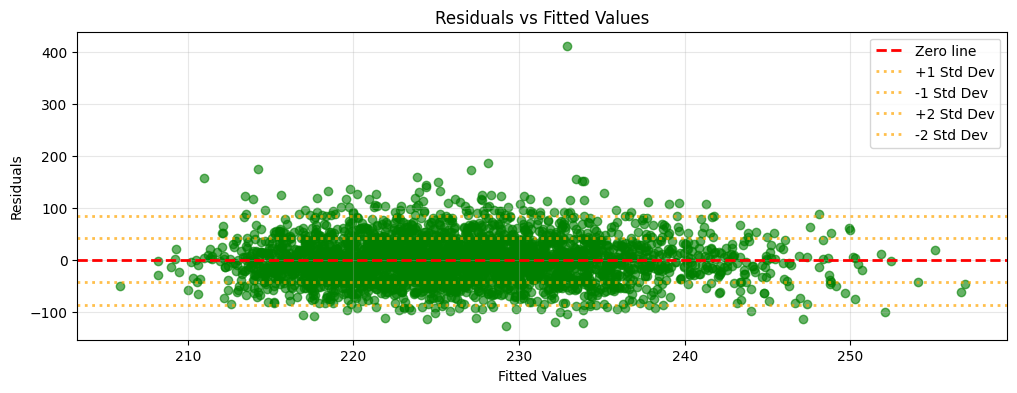

In [20]:
# Write your code here

# calculate residuals
residuals = y - y_pred

# create a scatter plot using green scatter points with transparency (alpha=0.6) with fitted values on x-axis and residuals on y-axis
plt.figure(figsize=(12, 4))

# add title and labels
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.scatter(y_pred, residuals, color='green', alpha=0.6)

# add a horizontal reference line at y=0
plt.axhline(y=0, color='r', linestyle='--', lw=2, label='Zero line')

# add +/- 1 SD
plt.axhline(y=np.std(residuals), color='orange', linestyle=':', lw=2, alpha=0.7, label='+1 Std Dev')
plt.axhline(y=-np.std(residuals), color='orange', linestyle=':', lw=2, alpha=0.7, label='-1 Std Dev')

# add +/- 2 SD
plt.axhline(y=2*np.std(residuals), color='orange', linestyle=':', lw=2, alpha=0.7, label='+2 Std Dev')
plt.axhline(y=-2*np.std(residuals), color='orange', linestyle=':', lw=2, alpha=0.7, label='-2 Std Dev')

# include legend and light grid (alpha = 0.3)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout


### **Residual Plot Interpretation Questions**

#### **Question 7.1: Assumption Checking** (**3 points**)
Examine your fitted vs residuals plot:
- Do the residuals appear randomly scattered around zero (linearity assumption)?
- Is the spread of residuals roughly constant across all fitted values?
- Are there any obvious patterns, curves, or funnel shapes in the residuals?

*Write your answer here:*

#### **Question 7.2: Outlier Detection** (**2 points**)
Look at the standard deviation reference lines:
- Are there any points beyond $\pm$2 SD that might be outliers?
- Do most residuals fall within $\pm$1 SD as expected?

*Write your answer here:*


## Part 8: Interaction Term Analysis (**20 points total**)

### Instructions:
Explore whether the effect of smoking on cholesterol depends on a patient's age by adding an interaction term to your regression model. You'll compare a main effects model with an interaction model to see if the interaction significantly improves prediction.

### **Code Implementation** (**12 points**)

**Your Task:** 
1. Create an age × smoking interaction term (age multiplied by ncigs)
2. Set up two models: main effects only vs. main effects + interaction
3. Fit both models using statsmodels OLS
4. Compare model performance ($R^2$, F p-values)
5. Extract and test the significance of the interaction coefficient

**Specific Requirements:**
- Create interaction term: `df['age_smoking_interaction'] = df['age'] * df['ncigs']`
- Model 1: age, bmi, sbp, ncigs (main effects only)
- Model 2: age, bmi, sbp, ncigs, age_smoking_interaction
- Print $R^2$ and F p-values for both models
- Extract interaction coefficient, t-statistic, and p-value
- Include conditional statement to report significance
- Use proper section headers and formatting


In [28]:
# Write your code here

# create interaction term
df['age_smoking_interaction'] = df['age'] * df['ncigs']

# set up Model 1: main effects only
X1 = df[['age', 'bmi', 'sbp', 'ncigs']]

# set up Model 2: main effects + interaction term
X2 = df[['age', 'bmi', 'sbp', 'ncigs', 'age_smoking_interaction']]

# fit both models using statsmodels OLS
X1 = sm.add_constant(X1)
X2 = sm.add_constant(X2)
model1 = sm.OLS(y, X1).fit()
model2 = sm.OLS(y, X2).fit()

# print R^2 and F p-values for both models
print("Model 1 (Main Effects) R^2: ", model1.rsquared)
print("Model 1 (Main Effects) F p-value: ", model1.f_pvalue)
print("\nModel 2 (With Interaction) R^2: ", model2.rsquared)
print("Model 2 (With Interaction) F p-value: ", model2.f_pvalue)

# extract stats
interaction_coef_2 = model2.params['age_smoking_interaction']
t_2 = model2.tvalues['age_smoking_interaction']
p_2 = model2.pvalues['age_smoking_interaction']
print("\nModel 2 Interaction Coefficient: ", interaction_coef_2)
print("Model 2 t-statistic: ", t_2)
print("Model 2 p-value: ", p_2)

# report significance of the interaction term in Model 2
if p_2 < 0.05:
    print("The interaction term is statistically significant in Model 2 (p < 0.05).")
else:
    print("The interaction term is not statistically significant in Model 2 (p >= 0.05).")

Model 1 (Main Effects) R^2:  0.031184902379900903
Model 1 (Main Effects) F p-value:  1.3093832890169565e-20

Model 2 (With Interaction) R^2:  0.03263510057948127
Model 2 (With Interaction) F p-value:  7.216175446918359e-21

Model 2 Interaction Coefficient:  -0.020981104532233757
Model 2 t-statistic:  -2.1682359719568187
Model 2 p-value:  0.030215700629290895
The interaction term is statistically significant in Model 2 (p < 0.05).


C:\Users\lirou\AppData\Local\Temp\ipykernel_22408\3376111486.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_smoking_interaction'] = df['age'] * df['ncigs']


### **Interaction Analysis Questions**

#### **Question 8.1: Model Comparison** (**4 points**)
Compare your two models:
- How much did R² increase when adding the interaction term?
- Is the interaction coefficient statistically significant (p < 0.05)?
- Based on the results, does the interaction term improve the model?
- What does the interaction coefficient value tell you about the relationship?

*Write your answer here:*

#### **Question 8.2: Clinical Interpretation** (**4 points**)
If the interaction is significant, interpret what it means clinically:
- Does the effect of smoking on cholesterol change with age?
- Is smoking more or less harmful for older vs. younger adults?
- How would you explain this finding to a physician or patient?
- Does this result make biological/medical sense?

*Write your answer here:*



## Part 9: Interaction Visualization (**18 points total**)

### Instructions:
Create two complementary visualizations to understand how the age × smoking interaction affects cholesterol predictions. The left panel shows how the smoking effect changes with age, while the right panel shows actual predicted cholesterol levels for smokers vs non-smokers across different ages.

### **Code Implementation** (**12 points**)

**Your Task:** 
1. Create a figure with two subplots side by side (figsize=(14, 5))
2. **Left panel**: Plot how smoking effect (coefficient) changes with age
   - X-axis: Age (30, 40, 50, 60, 70 years)
   - Y-axis: Smoking effect on cholestrol (mg/dL per cigarette/day)
   - Add value annotations on each point
   - Include horizontal zero line and grid
3. **Right panel**: Plot predicted cholesterol for smokers vs non-smokers
   - Compare non-smokers (0 cigs/day) vs heavy smokers (20 cigs/day)
   - Use average BMI and SBP values for other predictors
   - Include legend and proper styling


**Specific Requirements:**
- Left panel: Red circles with lines, value annotations, horizontal zero line
- Right panel: Green line for non-smokers, red line for smokers, different markers
- Both panels: Proper labels, titles, grids (alpha=0.3)
- Use `plt.tight_layout()` for proper spacing



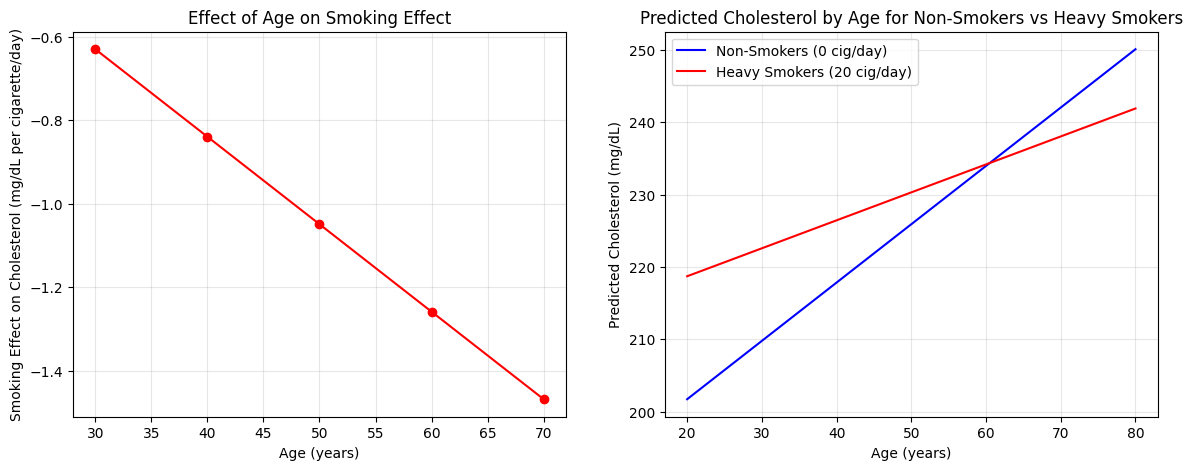

In [29]:
# Write your code here

# create a figure with two subplots
plt.figure(figsize=(14, 5))

# LEFT SUBPLOT
plt.subplot(1, 2, 1)
plt.title('Effect of Age on Smoking Effect')
plt.xlabel('Age (years)')
plt.ylabel('Smoking Effect on Cholesterol (mg/dL per cigarette/day)')

ages = np.array([30, 40, 50, 60, 70]) # x-axis
smoking_effect = interaction_coef_2 * ages

plt.plot(ages, smoking_effect, 'ro-', label='Smoking Effect')
plt.grid(alpha=0.3)

# RIGHT SUBPLOT
plt.subplot(1, 2, 2)
plt.title('Predicted Cholesterol by Age for Non-Smokers vs Heavy Smokers')
plt.xlabel('Age (years)')
plt.ylabel('Predicted Cholesterol (mg/dL)')

#use average values for bmi and sbp
avg_bmi = df['bmi'].mean()
avg_sbp = df['sbp'].mean()

# plot predicted cholesterol for non-smoker and smokers
ages = np.linspace(20, 80, 100)
non_smoker_chol = (model2.params['const'] +
                   model2.params['age'] * ages +
                   model2.params['bmi'] * avg_bmi +
                   model2.params['sbp'] * avg_sbp +
                   model2.params['ncigs'] * 0 +
                   model2.params['age_smoking_interaction'] * ages * 0)
heavy_smoker_chol = (model2.params['const'] +
                     model2.params['age'] * ages +
                     model2.params['bmi'] * avg_bmi +
                     model2.params['sbp'] * avg_sbp +
                     model2.params['ncigs'] * 20 +
                     model2.params['age_smoking_interaction'] * ages * 20)
plt.plot(ages, non_smoker_chol, 'b-', label='Non-Smokers (0 cig/day)')
plt.plot(ages, heavy_smoker_chol, 'r-', label='Heavy Smokers (20 cig/day)')
plt.legend()
plt.grid(alpha=0.3)

### **Interaction Visualization Questions**

#### **Question 9.1: Smoking Effect Analysis** (**3 points**)
Examine the left panel (smoking effect vs age):
- At what age does smoking have the strongest effect on cholesterol?
- At what age does smoking become less harmful or even beneficial?
- What does the negative slope of this line tell you about the interaction?

*Write your answer here:*

#### **Question 9.2: Clinical Implications** (**3 points**)
Examine the right panel (predicted cholesterol levels):
- How do the cholesterol trajectories differ between smokers and non-smokers?
- At what age range is the difference between smokers and non-smokers largest?
- Based on these visualizations, what would you tell a 30-year-old smoker vs a 70-year-old smoker about their cholesterol risk?

*Write your answer here:*



